<a href="https://colab.research.google.com/github/neelarka/Azimuth/blob/master/Practicum_Hw_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Dependcies
import pandas as pd

In [ ]:
# Importing the file in google colab
from google.colab import files
files.upload()

Saving walkx.csv to walkx.csv


{'walkx.csv': b'Time,Log_Time,Mean,MeanSqred,Log_MeanSqr\r\n0.1,-1,1.379144798,1.902040374,0.279219731\r\n0.2,-0.698970004,1.311546263,1.7201536,0.235567229\r\n0.3,-0.522878745,1.387154242,1.924196891,0.284249509\r\n0.4,-0.397940009,1.498400737,2.245204769,0.351255956\r\n0.5,-0.301029996,1.451920808,2.108074033,0.323885859\r\n0.6,-0.22184875,1.626431717,2.64528013,0.42247167\r\n0.7,-0.15490196,1.634637778,2.672040665,0.426843063\r\n0.8,-0.096910013,1.772124384,3.140424832,0.496988403\r\n0.9,-0.045757491,1.880671273,3.536924437,0.548625782\r\n1,0,2.021819898,4.0877557,0.611484933\r\n1.1,0.041392685,2.001123608,4.004495694,0.602547831\r\n1.2,0.079181246,2.351314271,5.528678801,0.74262136\r\n1.3,0.113943352,2.437793579,5.942837534,0.773993858\r\n1.4,0.146128036,2.446946842,5.987548848,0.777249069\r\n1.5,0.176091259,2.481670745,6.158689687,0.789488322\r\n1.6,0.204119983,2.717348936,7.38398524,0.86829082\r\n1.7,0.230448921,2.705773309,7.3212092,0.864582817\r\n1.8,0.255272505,2.940358065,8.6

In [ ]:
# Reading the csv through pandas
df1 = pd.read_csv('walkx.csv') 

In [ ]:
df1

,Time,Log_Time,Mean,MeanSqred,Log_MeanSqr
0,0.1,-1.000000,1.379145,1.902040,0.279220
1,0.2,-0.698970,1.311546,1.720154,0.235567
2,0.3,-0.522879,1.387154,1.924197,0.284250
3,0.4,-0.397940,1.498401,2.245205,0.351256
4,0.5,-0.301030,1.451921,2.108074,0.323886
...,...,...,...,...,...
642,64.3,1.808211,31.074000,965.593476,2.984794
643,64.4,1.808886,31.333000,981.756889,2.992004
644,64.5,1.809560,32.665000,1067.002225,3.028165
645,64.6,1.810233,32.708000,1069.813264,3.029308


In [ ]:
# Importing dependencies for linear Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
x = df1["Log_Time"]
y = df1["Log_MeanSqr"]

Estimated coefficients:
 Intercept, Alpha = 0.715256893701111 and Slope, log(C) = 1.0649331637423132


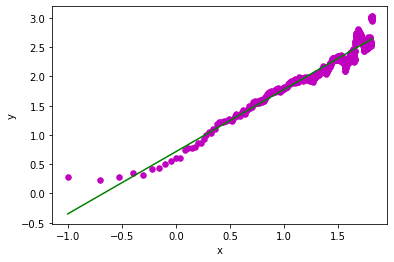

In [ ]:
# Performing simple linear regression on x and y
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 
  
def main(): 
    # observations 
    # Taking only first 100 points
    x = df1["Log_Time"]
    y = df1["Log_MeanSqr"]
  
    # estimating coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients:\n Intercept, Alpha = {} and Slope, log(C) = {}".format(b[0], b[1])) 
  
    # plotting regression line 
    plot_regression_line(x, y, b) 

main()

In [ ]:
import scipy.stats
def linear_regression(x, y, prob):
    """
    Return the linear regression parameters and their <prob> confidence intervals.
    ex:
    >>> linear_regression([.1,.2,.3],[10,11,11.5],0.95)
    """
    x = x
    y = y
    n = len(x)
    xy = x * y
    xx = x * x

    # estimates

    b1 = (xy.mean() - x.mean() * y.mean()) / (xx.mean() - x.mean()**2)
    b0 = y.mean() - b1 * x.mean()
    s2 = 1./n * sum([(y[i] - b0 - b1 * x[i])**2 for i in range(n)])
    print ('b0 = ',b0)
    print ('b1 = ',b1)
    # print ('s2 = ',s2)
    
    #confidence intervals
    
    alpha = 1 - prob
    c1 = scipy.stats.chi2.ppf(alpha/2.,n-2)
    c2 = scipy.stats.chi2.ppf(1-alpha/2.,n-2)
    # print ('the confidence interval of s2 is: ',[n*s2/c2,n*s2/c1])
    
    c = -1 * scipy.stats.t.ppf(alpha/2.,n-2)
    bb1 = c * (s2 / ((n-2) * (xx.mean() - (x.mean())**2)))**.5
    print ('the confidence interval of b1 is: ',[b1-bb1,b1+bb1])
    
    bb0 = c * ((s2 / (n-2)) * (1 + (x.mean())**2 / (xx.mean() - (x.mean())**2)))**.5
    print ('the confidence interval of b0 is: ',[b0-bb0,b0+bb0])
    return None

In [ ]:
x = df1["Log_Time"]
y = df1["Log_MeanSqr"]

In [ ]:
## Showing the confidence interval for slope b1, Alpha and intercept b0, Log(C)
linear_regression(x,y,0.95)

b0 =  0.7152568937011119
b1 =  1.0649331637423125
the confidence interval of b1 is:  [1.044342585427706, 1.085523742056919]
the confidence interval of b0 is:  [0.6855349841503526, 0.7449788032518712]
